In [1]:
exec(open('init_notebook.py').read())
import dill
from highD.PlotHelper import Histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from highD.DataHandler import *

current working dirC:\Users\abjawad\Documents\GitHub\cogmod-human-driver-model\highd_tools


c:\Users\abjawad\.conda\envs\carla-vehicle\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\abjawad\.conda\envs\carla-vehicle\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\abjawad\.conda\envs\carla-vehicle\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
dillDir = 'dill'
dill_highD_list = []
for i in range(1, 61):
    filename = dillDir + '/' + str(i)+'.dill'
    ifile = open(filename, "rb")
    dill_highD_list.append(dill.load(ifile))
    ifile.close()


In [3]:
def plotMetricsDF(data, col, xlabel="", bins=10, kde=True):
        g = sns.displot(data=data, x=col, kde=kde, bins=bins)
        g.fig.set_size_inches(10,4)
        if xlabel != "":
            g.set_axis_labels(xlabel, "Count")

        g.set_titles(f"Distribution of {xlabel}")
        plt.axvline(x=data[col].mean(), color='red')
        plt.show()

## Distribution Velocity 

Minimum Velocity

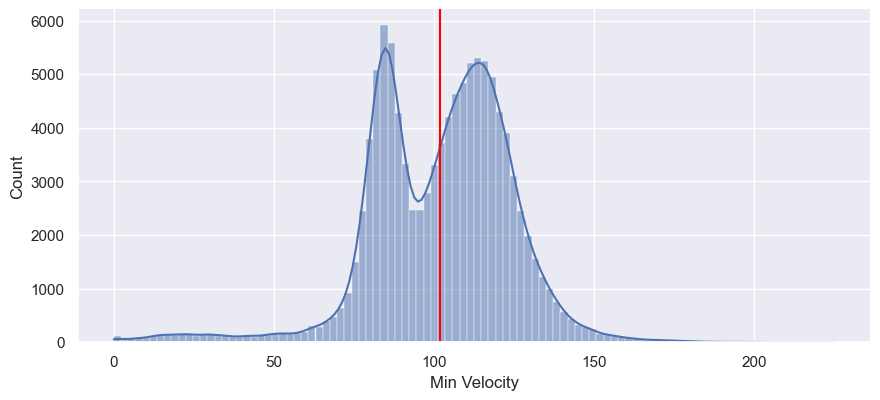

In [4]:
item_list = []
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    minVelocity = trackMeta[['minXVelocity']] * 3.60
    item_list.extend(minVelocity.values)
df = pd.DataFrame(item_list, columns=['minXVelocity'])
plotMetricsDF(df, 'minXVelocity', xlabel='Min Velocity', bins=100, kde=True)

Maximum Velocity

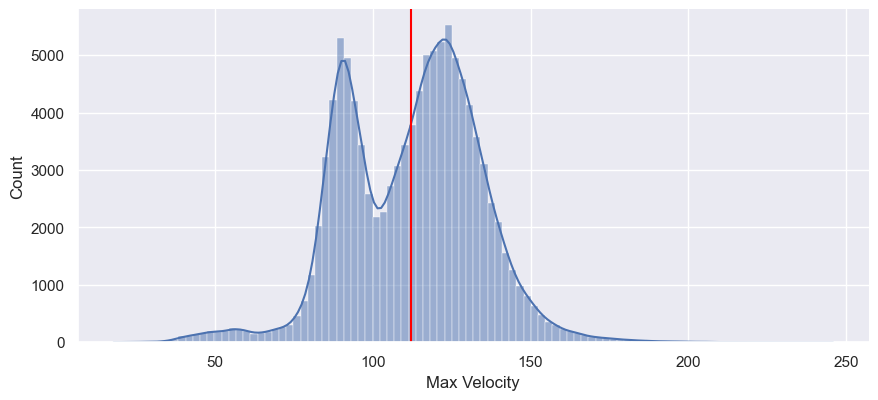

In [5]:
item_list = []
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    maxVelocity = trackMeta[['maxXVelocity']] * 3.60
    item_list.extend(maxVelocity.values)
df = pd.DataFrame(item_list, columns=['maxXVelocity'])
plotMetricsDF(df, 'maxXVelocity', xlabel='Max Velocity', bins=100, kde=True)

Average Velocity

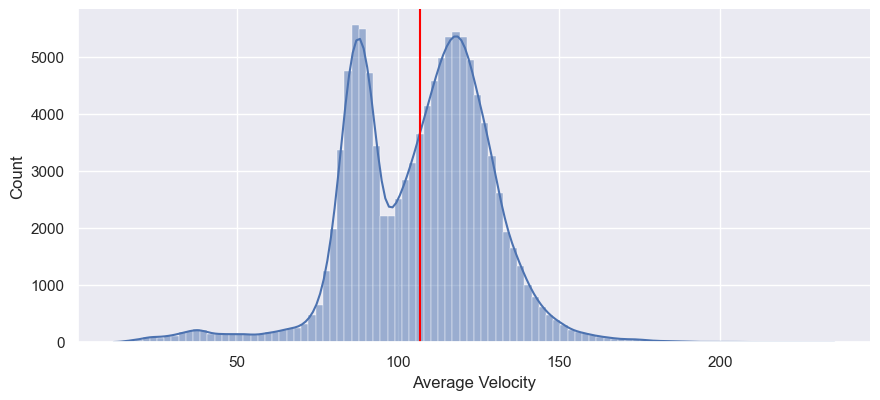

In [6]:
item_list = []
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    meanVelocity = trackMeta[['meanXVelocity']] * 3.60
    item_list.extend(meanVelocity.values)
df = pd.DataFrame(item_list, columns=['meanXVelocity'])
plotMetricsDF(df, 'meanXVelocity', xlabel='Average Velocity', bins=100, kde=True)

## Headway Distribution

Minimum Distance Headway


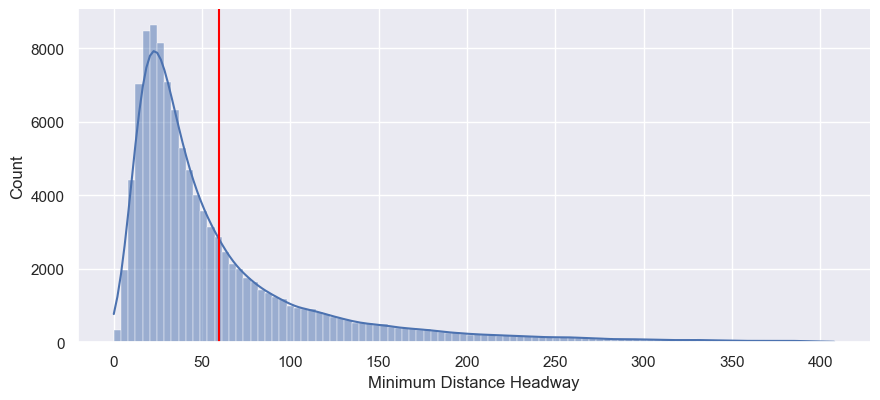

In [7]:
item_list = []
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    trackMeta = trackMeta[trackMeta['minDHW'] > 0]
    minDHW = trackMeta[['minDHW']]
    item_list.extend(minDHW.values)
df = pd.DataFrame(item_list, columns=['minDHW'])
plotMetricsDF(df, 'minDHW', xlabel='Minimum Distance Headway', bins=100, kde=True)


Minimum Time Headway

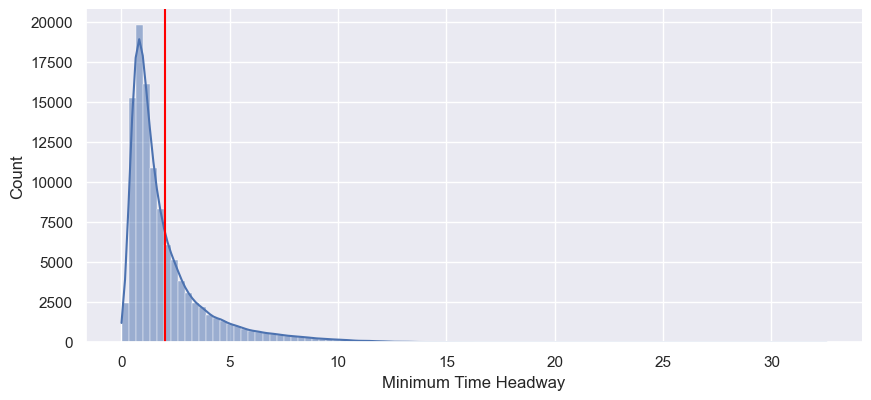

In [8]:
item_list = []
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    trackMeta = trackMeta[trackMeta['minTHW'] > 0]
    minTHW = trackMeta[['minTHW']]
    item_list.extend(minTHW.values)
df = pd.DataFrame(item_list, columns=['minTHW'])
plotMetricsDF(df, 'minTHW', xlabel='Minimum Time Headway', bins=100, kde=True)

Minimum Time to Collision

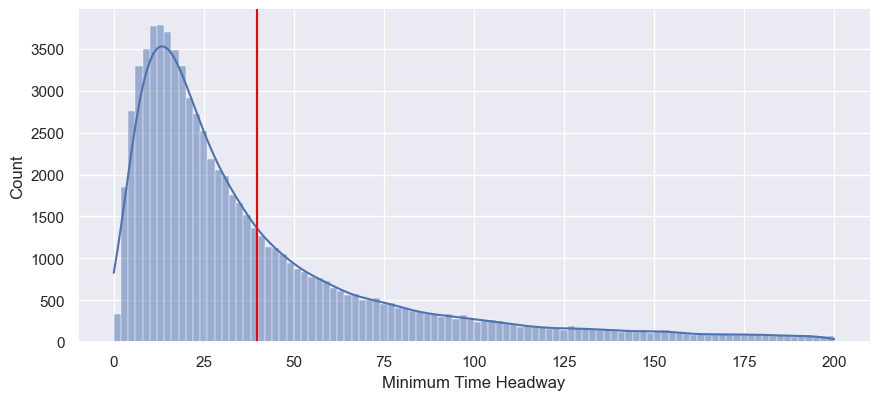

In [9]:
item_list = []
for highD in dill_highD_list:
    trackMeta = highD.tracksMeta
    trackMeta = trackMeta[trackMeta['minTTC'].between(0, 200)]
    minTTC = trackMeta[['minTTC']]
    item_list.extend(minTTC.values)
df = pd.DataFrame(item_list, columns=['minTTC'])
plotMetricsDF(df, 'minTTC', xlabel='Minimum Time Headway', bins=100, kde=True)